In [ ]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

In [ ]:
#Загрузим изображение Альфреда Молины
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print('Файл "{name}" загружен. Размер файла {length} байт'.format(name=filename, length=len(uploaded[filename])))

Saving OTTO.jpg to OTTO (1).jpg
Файл "OTTO (1).jpg" загружен. Размер файла 42210 байт


In [ ]:
# Загрузим изображение очков
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print('Файл "{name}" загружен. Размер файла {length} байт'.format(name=filename, length=len(uploaded[filename])))

Saving Очки Лепса.png to Очки Лепса.png
Файл "Очки Лепса.png" загружен. Размер файла 15959 байт


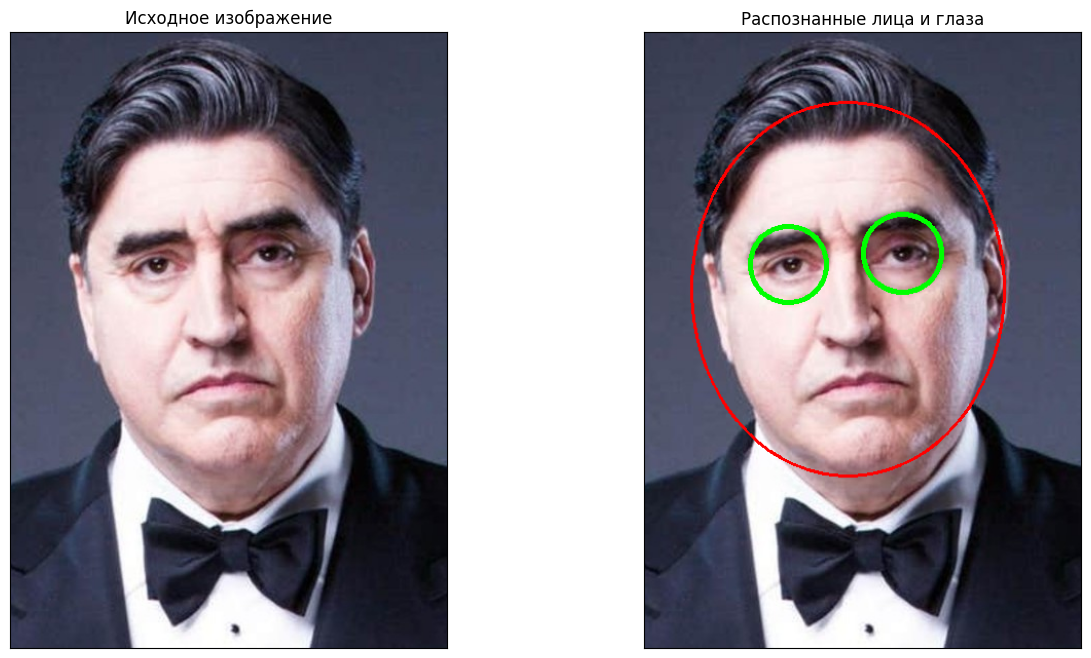

In [ ]:
# Загрузка изображения
img = cv2.imread('./OTTO.jpg')

img2 = img.copy()

# загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# Загрузка каскада для поиска глаз
gdown.download('https://storage.yandexcloud.net/academy.ai/haarcascade_eye.xml', 'haarcascade_eye.xml', quiet=True)
# Загрузка каскада для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img)

# формирование прямоугольника вокруг каждого обнаруженного лица
for box in bboxes:
    # Формирование координат прямоугольника
    x, y, width, height = box
    x2, y2 = x + width, y + height

    # Находим центр прямоугольника
    center = ((x + x2) // 2, (y + y2) // 2)

    # Определяем радиусы овала
    radius_x = width // 2
    radius_y = height // 2 + height // 10 #Увеличим высоту овала на 10%

    # Рисуем овал
    cv2.ellipse(img2, center, (radius_x, radius_y), 0, 0, 360, (0, 0, 255), 2)

    face = img2[y:y + height, x:x + width] # найденная область с лицом

    # выполнение распознавания глаз
    eyes = classifier_eye.detectMultiScale(face, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30)) # Добавим параметры для более точного распознавания глаз

    for (x_eye,y_eye,w_eye,h_eye) in eyes:

        # определяем центр круга
        center = (int(x_eye + 0.5*w_eye), int(y_eye + 0.5*h_eye))

        # вычисляем радиус окружности (подобран эмпирическим путем)
        radius = int(0.3 * (w_eye + h_eye))
        color = (0, 255, 0) # цвет в RGB (интенсивность цветов красный-зеленый-синий от 0 до 255)
        thickness = 3 # толщина линии
        # рисуем круг
        cv2.circle(face, center, radius, color, thickness)


fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица и глаза')

pyplot.show()

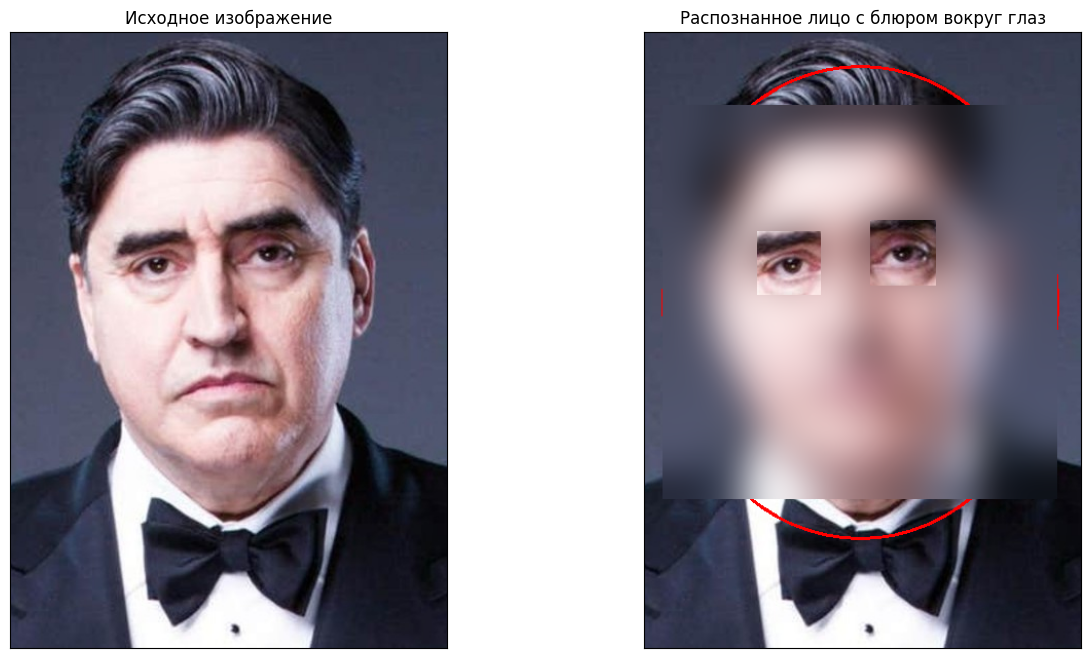

In [ ]:
import cv2
import gdown
from matplotlib import pyplot
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline

# Загрузка изображения
img = cv2.imread('./OTTO.jpg')
img2 = img.copy()

# загрузка каскада Хаара
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")
eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# функция для заблюривания лица
def blur_face(img):
    (h, w) = img.shape[:2]
    dW = int(w / 3.0)
    dH = int(h / 3.0)
    if dW % 2 == 0:
        dW -= 1
    if dH % 2 == 0:
        dH -= 1
    return cv2.GaussianBlur(img, (dW, dH), 0)

# Выполнение распознавания лиц
faces = face_classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# Формирование прямоугольника вокруг каждого обнаруженного лица
for (x, y, width, height) in faces:
    # Находим центр прямоугольника
    center = ((x + x + width) // 2, (y + y + height) // 2)

    # Определяем радиусы овала
    radius_x = width // 2
    radius_y = (height // 2) + (height // 10)  # Увеличим высоту овала на 10%

    # Рисуем овал
    cv2.ellipse(img2, center, (radius_x, radius_y), 0, 0, 360, (0, 0, 255), 2)

    # Найдем глаза в области лица
    roi_gray = img[y:y + height, x:x + width]
    eyes = eye_classifier.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Заблюрим лицо, исключая области глаз
    blurred_face = blur_face(roi_gray)

    # Заменим выделенное лицо на заблюренное, исключая области глаз
    for (ex, ey, ew, eh) in eyes:
        blurred_face[ey:ey + eh, ex:ex + ew] = roi_gray[ey:ey + eh, ex:ex + ew]

    img2[y:y + height, x:x + width] = blurred_face

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанное лицо с блюром вокруг глаз')

pyplot.show()